# ASP Bundle Adjust Plotting
## Examples for BlackSky Easton Glacier test case (n=20)
David Shean  
12/24/22

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors
import contextily as ctx

In [2]:
from asp_plot_util import *

In [3]:
# topdir = '/nobackup/bpurint1/data/utqiagvik/WV/utqiagvik_wv_EE/2022/WV02_20220411_10300100D102A400_10300100D1B7D600'
# ba_prefix = 'ba/ba_100ips_dg'

topdir = '~/Dropbox/UW_Shean/WV/2022/WV02_20220413_10300100D04DB500_10300100D0668800'
ba_prefix = 'ba/ba_100ips_dg'

# topdir = '/nobackup/bpurint1/data/utqiagvik/WV/utqiagvik_wv_EE/2022'
# ba_prefix = 'csm_refinement_all_pairs/csm_out'

map_crs = 'EPSG:32604'
refdem = 'COP30_lzw-adj_proj.tif' # NOT needed, because geodiff output is: *-initial_residuals_pointmap-diff.csv, but useful for titling map
refdem_abbrv = refdem[0:5]

In [4]:
# Use to compare multi-stage bundle_adjust results
# compares the initial bundle_adjust output with post-pc_align bundle_adjust output
# should actually ALWAYS run this after the first step (if `pc_align` version exists)
two_stage = False

In [5]:
cd $topdir

/Users/ben/Library/CloudStorage/Dropbox/UW_Shean/WV/2022/WV02_20220413_10300100D04DB500_10300100D0668800


In [6]:
source = ctx.providers.Esri.WorldImagery
#source = ctx.providers.Stamen.Terrain

In [7]:
ctx_kwargs = {'crs':map_crs, 'source':source, 'attribution_size':0, 'alpha':0.5}

## Residuals

In [8]:
def read_residuals(csv_fn):
    resid_cols=['lon', 'lat', 'height_above_datum', 'mean_residual', 'num_observations']
    resid_df = pd.read_csv(csv_fn, skiprows=2, names=resid_cols)
    #Need the astype('str') to handle cases where column has dtype of int (without the # from DEM appended to some rows)
    resid_df['from_DEM'] = resid_df['num_observations'].astype('str').str.contains('# from DEM')
    resid_df['num_observations'] = resid_df['num_observations'].astype('str').str.split('#', expand=True)[0].astype(int)
    resid_gdf = gpd.GeoDataFrame(resid_df, geometry=gpd.points_from_xy(resid_df['lon'], resid_df['lat'], crs='EPSG:4326'))
    return resid_gdf

In [9]:
resid_init_csv = ba_prefix+'-initial_residuals_pointmap.csv'
resid_final_csv = ba_prefix+'-final_residuals_pointmap.csv'

In [10]:
#This compares the initial bundle_adjust output with post-pc_align bundle_adjust output
if two_stage:
    resid_init_csv = ba_prefix+'-final_residuals_pointmap.csv'
    resid_final_csv = ba_prefix+'_pc_align-final_residuals_pointmap.csv'

In [11]:
resid_init = read_residuals(resid_init_csv)
resid_final = read_residuals(resid_final_csv)

In [12]:
resid_init

,lon,lat,height_above_datum,mean_residual,num_observations,from_DEM,geometry
0,-156.902134,71.363336,976.370340,387.927817,2,False,POINT (-156.90213 71.36334)
1,-156.980833,71.362034,-9359.419096,471.412476,2,False,POINT (-156.98083 71.36203)
2,-156.929425,71.374970,-1200.480933,491.708521,2,False,POINT (-156.92942 71.37497)
3,-156.893374,71.300905,2.664506,0.092254,2,False,POINT (-156.89337 71.30090)
4,-156.893160,71.299508,1.506604,0.149094,2,False,POINT (-156.89316 71.29951)
...,...,...,...,...,...,...,...
1847,-156.336665,71.352531,-786.916001,418.722382,2,False,POINT (-156.33666 71.35253)
1848,-156.353848,71.319624,-2015.545063,344.699897,2,False,POINT (-156.35385 71.31962)
1849,-156.348185,71.286395,-1543.676263,423.623021,2,False,POINT (-156.34819 71.28640)
1850,-156.389418,71.285789,-4628.435145,151.619067,2,False,POINT (-156.38942 71.28579)


<Axes: >

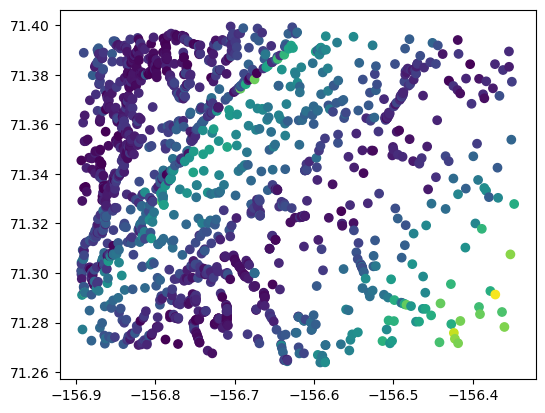

In [13]:
resid_final.plot(c=resid_final["mean_residual"])

In [14]:
#Computer center for map plots later
centroid_gdf = resid_final.to_crs(map_crs).dissolve().centroid

In [15]:
centroid_gdf

0    POINT (581338.425 7916538.948)
dtype: geometry

In [16]:
resid_init.describe()

,lon,lat,height_above_datum,mean_residual,num_observations
count,1852.000000,1852.000000,1852.000000,1852.000000,1852.0
mean,-156.705441,71.335840,-166.201627,36.610264,2.0
std,0.144300,0.038537,3396.738347,104.078992,0.0
min,-157.062982,71.261371,-27288.167974,0.002405,2.0
25%,-156.824618,71.301724,2.708612,0.364863,2.0
50%,-156.738213,71.337689,8.431007,0.817892,2.0
75%,-156.616172,71.371065,12.517130,1.034607,2.0
max,-156.251792,71.403612,28770.329269,623.791160,2.0


In [17]:
resid_final.describe()

,lon,lat,height_above_datum,mean_residual,num_observations
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.0
mean,-156.722102,71.337169,8.251879,0.293306,2.0
std,0.129732,0.038766,5.769562,0.238019,0.0
min,-156.893378,71.263947,0.155990,0.000046,2.0
25%,-156.829299,71.302019,3.031651,0.112057,2.0
50%,-156.749696,71.339618,8.488158,0.229862,2.0
75%,-156.647388,71.372766,11.521287,0.419122,2.0
max,-156.347956,71.399441,40.951157,1.507283,2.0


In [18]:
def resid_plot(init, final, col='mean_residual', clip_final=True, lognorm=False, clim=None, cmap='inferno'):
    f, axa = plt.subplots(1,2, figsize=(10,3), sharex=True, sharey=True)
    if clim is None:
        clim_init = get_clim(init[col], perc=(0,98))
        clim_final = get_clim(final[col], perc=(0,98))
        vmin = min(clim_init[0], clim_final[0])
        vmax = max(clim_init[1], clim_final[1])
    else:
        vmin, vmax = clim
    print(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    if lognorm:
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
    plot_kw = {'cmap':cmap, 'norm':norm, 's':1, 'legend':True, 'legend_kwds':{'label': col}}
    final.sort_values(by=col).to_crs(map_crs).plot(ax=axa[1], column=col, **plot_kw)
    ctx.add_basemap(ax=axa[1], **ctx_kwargs)
    if clip_final:
        axa[0].autoscale(False)
    init.sort_values(by=col).to_crs(map_crs).plot(ax=axa[0], column=col, **plot_kw)
    ctx.add_basemap(ax=axa[0], **ctx_kwargs)
    axa[0].set_title(f'Initial Residuals (n={init.shape[0]})')
    axa[1].set_title(f'Final Residuals (n={final.shape[0]})')
    plt.tight_layout()

4.641129059261099e-05 425.7136454110111


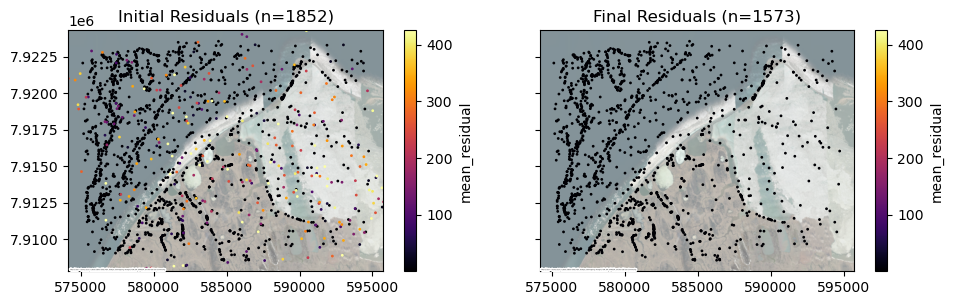

In [19]:
resid_plot(resid_init, resid_final, col='mean_residual', lognorm=False)

4.641129059261099e-05 425.7136454110111


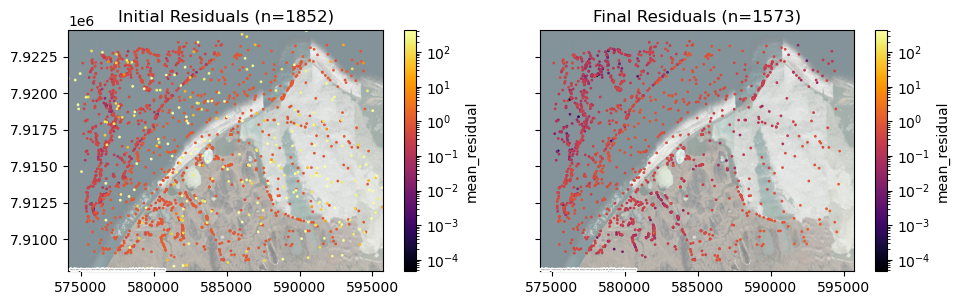

In [20]:
resid_plot(resid_init, resid_final, col='mean_residual', lognorm=True)

2.0 2.0


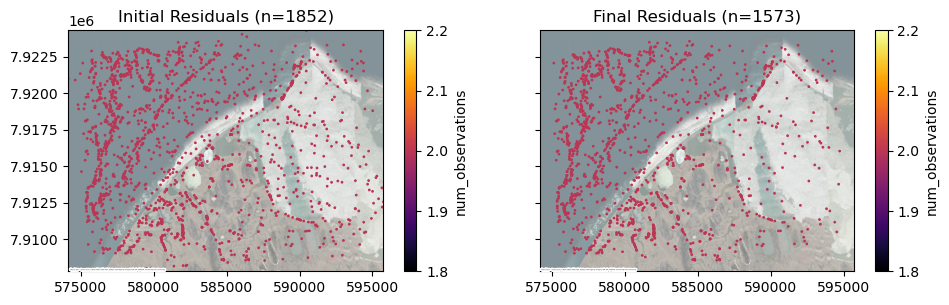

In [21]:
resid_plot(resid_init, resid_final, col='num_observations')

## Isolate points used during `--heights-from-DEM`
Most relelvant when refDEM was masked over changing surfaces

In [38]:
if 'from_DEM' in resid_init.columns:
    idx1 = resid_init['from_DEM']
    idx2 = resid_final['from_DEM']

In [42]:
if idx1.any() and idx2.any():
    resid_plot(resid_init[idx1], resid_final[idx2], col='mean_residual', lognorm=True)

5.344644365929222e-05 387.1042532843045


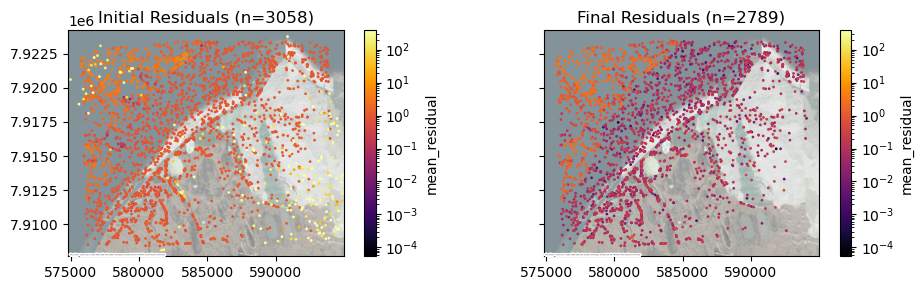

In [43]:
if ~idx1.any() and ~idx2.any():
    resid_plot(resid_init[~idx1], resid_final[~idx2], col='mean_residual', lognorm=True)

## geodiff output

In [22]:
def read_geodiff(csv_fn):
    resid_cols=['lon', 'lat', 'diff']
    resid_df = pd.read_csv(csv_fn, comment='#', names=resid_cols)
    resid_gdf = gpd.GeoDataFrame(resid_df, geometry=gpd.points_from_xy(resid_df['lon'], resid_df['lat'], crs='EPSG:4326'))
    return resid_gdf

In [23]:
#geodiff_csv = ba_prefix+f'-final_residuals_pointmap__{os.path.splitext(refdem)[0]}-diff.csv'
geodiff_init_csv = ba_prefix+'-initial_residuals_pointmap-diff.csv'
geodiff_final_csv = ba_prefix+'-final_residuals_pointmap-diff.csv'

In [24]:
#This compares the initial bundle_adjust output with post-pc_align bundle_adjust output
if two_stage:
    geodiff_init_csv = ba_prefix+'-final_residuals_pointmap-diff.csv'
    resid_final_csv = ba_prefix+'_pc_align-final_residuals_pointmap-diff.csv'

               lon          lat          diff
count  1852.000000  1852.000000   1852.000000
mean   -156.705441    71.335840   -166.731139
std       0.144300     0.038537   3396.722088
min    -157.062982    71.261371 -27287.266702
25%    -156.824618    71.301724      3.622432
50%    -156.738213    71.337689      9.170929
75%    -156.616172    71.371065     10.889207
max    -156.251792    71.403612  28771.278913
               lon          lat         diff
count  1573.000000  1573.000000  1573.000000
mean   -156.722102    71.337169     7.641095
std       0.129732     0.038766     3.694567
min    -156.893378    71.263947     1.014471
25%    -156.829299    71.302019     3.949471
50%    -156.749696    71.339618     9.240698
75%    -156.647388    71.372766    10.650540
max    -156.347956    71.399441    34.447690
-15 15


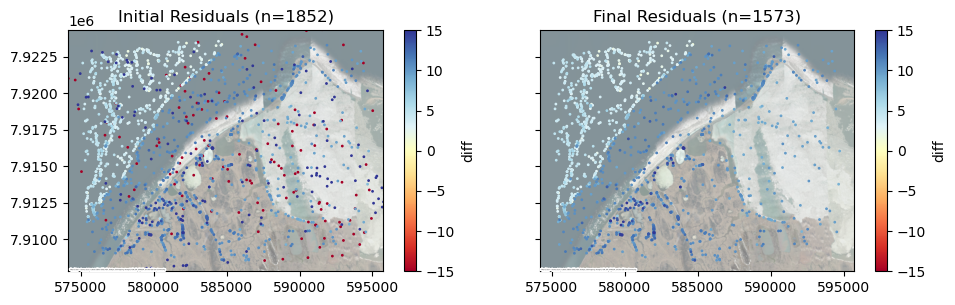

In [25]:
if os.path.exists(geodiff_init_csv) and os.path.exists(geodiff_final_csv):
    geodiff_init = read_geodiff(geodiff_init_csv)
    geodiff_final = read_geodiff(geodiff_final_csv)
    print(geodiff_init.describe())
    print(geodiff_final.describe())
    resid_plot(geodiff_init, geodiff_final, col='diff', clim=(-15, 15), cmap='RdYlBu')

## Mapproject Residuals

In [26]:
def read_mapproj_match_offset(csv_fn):
    resid_cols=['lon', 'lat', 'height_above_datum', 'mapproj_ip_dist_meters']
    resid_df = pd.read_csv(csv_fn, skiprows=2, names=resid_cols)
    resid_gdf = gpd.GeoDataFrame(resid_df, geometry=gpd.points_from_xy(resid_df['lon'], resid_df['lat'], crs='EPSG:4326'))
    return resid_gdf

In [27]:
mapproj_match_offset_txt = ba_prefix+'-mapproj_match_offsets.txt'

In [28]:
if os.path.exists(mapproj_match_offset_txt):
    mapproj_match_offset = read_mapproj_match_offset(mapproj_match_offset_txt)
    print(mapproj_match_offset.describe())
    col='mapproj_ip_dist_meters'


               lon          lat  height_above_datum  mapproj_ip_dist_meters
count  1573.000000  1573.000000         1573.000000             1573.000000
mean   -156.722208    71.337170            0.618935                5.001523
std       0.129711     0.038767            2.920797                2.332879
min    -156.893430    71.263947           -1.426491                1.043019
25%    -156.829380    71.302017           -0.934854                2.681373
50%    -156.749850    71.339622           -0.892412                5.895557
75%    -156.647580    71.372765            0.840598                6.938890
max    -156.348040    71.399445           13.676105               22.542068


<Axes: >

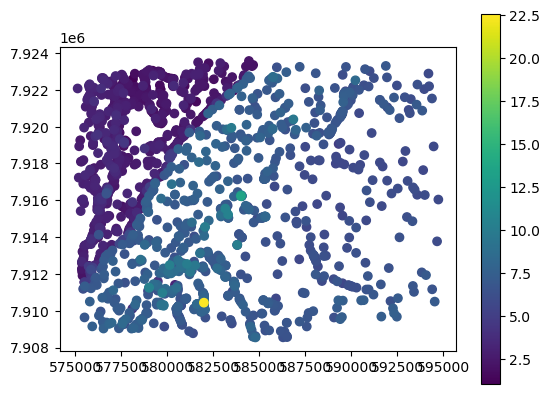

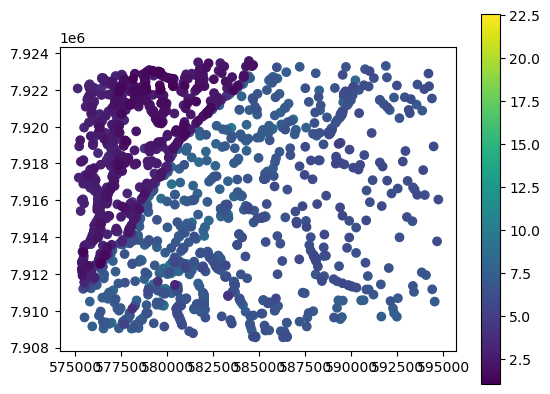

In [29]:
mapproj_match_offset.sort_values(by=col, ascending=True).to_crs(map_crs).plot(column=col, legend=True)
mapproj_match_offset.sort_values(by=col, ascending=False).to_crs(map_crs).plot(column=col, legend=True)

<Axes: >

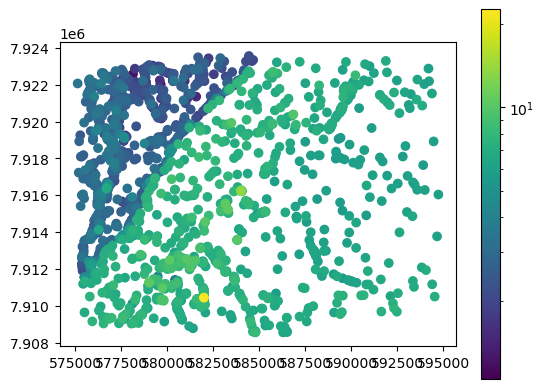

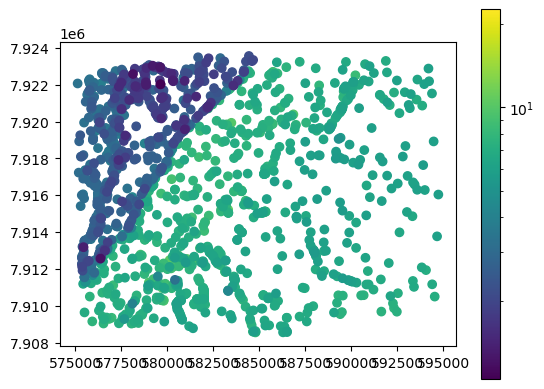

In [30]:
mapproj_match_offset.sort_values(by=col, ascending=True).to_crs(map_crs).plot(column=col, norm=matplotlib.colors.LogNorm(), legend=True)
mapproj_match_offset.sort_values(by=col, ascending=False).to_crs(map_crs).plot(column=col, norm=matplotlib.colors.LogNorm(), legend=True)

1.0430189 8.771120276


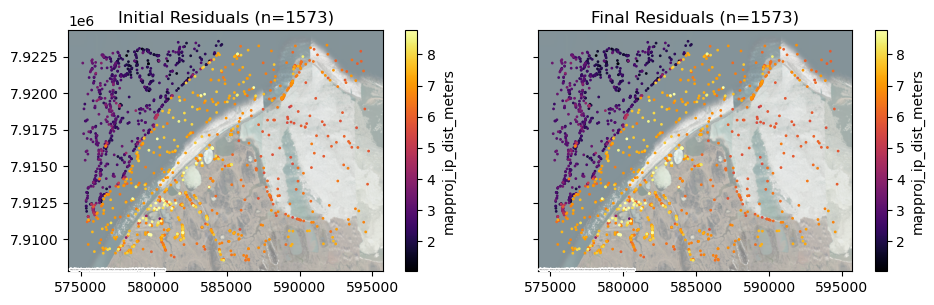

In [31]:
resid_plot(mapproj_match_offset, mapproj_match_offset, col='mapproj_ip_dist_meters', lognorm=False)

0.31547049 31.60263476


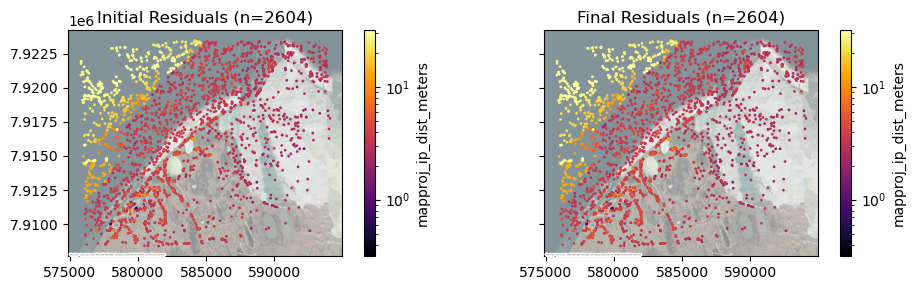

In [60]:
resid_plot(mapproj_match_offset, mapproj_match_offset, col='mapproj_ip_dist_meters', lognorm=True)

## Plot camera positions (These outputs only exist for Pinhole cameras!)

In [61]:
def read_cameras(csv_fn):
    cam_cols=['input_cam_file','x','y','z','r11','r12','r13','r21','r22','r23','r31','r32','r33']
    cam_df = pd.read_csv(csv_fn, header=0, names=cam_cols, index_col='input_cam_file')
    global_id = cam_df.index.to_series().str.split('BSG', expand=True)[1].str.split('-', expand=True)[1].astype('int') - 100
    cam_df['global_id'] = global_id
    cam_gdf = gpd.GeoDataFrame(cam_df, geometry=gpd.points_from_xy(cam_df['x'], cam_df['y'], cam_df['z'], crs='EPSG:4978'))
    return cam_gdf

In [62]:
cam_init_csv = ba_prefix+'-initial-cameras.csv'
cam_final_csv = ba_prefix+'-final-cameras.csv'

In [63]:
#This compares the initial bundle_adjust output with post-pc_align bundle_adjust output
if two_stage:
    cam_init_csv = ba_prefix+'-final-cameras.csv'
    cam_final_csv = ba_prefix+'_pc_align-final-cameras.csv'

In [64]:
cam_init_gdf = read_cameras(cam_init_csv)
cam_final_gdf = read_cameras(cam_final_csv)

FileNotFoundError: [Errno 2] No such file or directory: 'ba/ba_100ips_dg-initial-cameras.csv'

In [ ]:
cam_delta = cam_init_gdf[['x','y','z']] - cam_final_gdf[['x','y','z']]
#The .values here drops the indices (needed when tsai filenames are different at different stages)
if two_stage:
    cam_delta = cam_init_gdf[['x','y','z']].values - cam_final_gdf[['x','y','z']].values
cam_final_gdf['diff_m'] = np.sqrt(np.square(cam_delta).sum(axis=1))

In [ ]:
#For some reason, this doesn't yield same results as above
cam_final_gdf['diff_m_2'] = cam_final_gdf.distance(cam_init_gdf) #align=True

In [ ]:
#cam_init_idx = cam_init['input_cam_file'].str.split('/', expand=True)

### Determine relative local time and time offsets

In [ ]:
temp = cam_final_gdf.index.to_series().str.split('BSG', expand=True)[1].str.split('-', expand=True).loc[:,2:3]
cam_final_gdf['dt'] = pd.to_datetime(temp[2] + temp[3], utc=True)

In [ ]:
min_dt_str = cam_final_gdf['dt'].min().strftime('%Y-%m-%d %H:%M')

In [ ]:
cam_final_gdf['dt_local'] = cam_final_gdf['dt'].dt.tz_convert('America/Denver')

In [ ]:
cam_final_gdf['dt_diff'] = cam_final_gdf['dt'] - cam_final_gdf['dt'].min()

In [ ]:
cam_final_gdf['time'] = cam_final_gdf['dt'].dt.time

In [ ]:
cam_final_gdf['hr'] = ((cam_final_gdf['dt'] - cam_final_gdf['dt'].dt.normalize()) / pd.Timedelta('1 second')).astype(int) / 3600

In [ ]:
cam_final_gdf['hr_local'] = ((cam_final_gdf['dt_local'] - cam_final_gdf['dt_local'].dt.normalize()) / pd.Timedelta('1 second')).astype(int) / 3600

In [ ]:
#cam_final_gdf['time_diff'] = cam_final_gdf['time_diff'] - cam_final_gdf['time_diff'].min()

In [ ]:
cam_final_gdf['dt_diff_days'] = cam_final_gdf['dt_diff'].dt.total_seconds()/86400

In [ ]:
cam_final_gdf['mx'] = cam_final_gdf.to_crs(map_crs).geometry.x.values
cam_final_gdf['my'] = cam_final_gdf.to_crs(map_crs).geometry.y.values

In [ ]:
cam_final_gdf.describe()

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='hr_local', s=36, cmap='twilight', edgecolor='k', vmin=0, vmax=24)
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)
ax.set_title('Local time of acquisition')

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='dt_diff_days', s=36, cmap='inferno', edgecolor='k')
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)
ax.set_title('Time offset relative to '+min_dt_str)

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='dt_diff', s=36, cmap='inferno', edgecolor='k')
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='dt', s=36, cmap='inferno', edgecolor='k')
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
ax = cam_final_gdf.to_crs(map_crs).plot(c=cam_final_gdf['dt'], cmap='inferno', legend='True', edgecolor='k', legend_kwds={'label': "Acquisition Datetime"})
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
ax = cam_final_gdf.to_crs(map_crs).plot(c=cam_final_gdf['dt'].dt.date, cmap='inferno', legend='True', edgecolor='k', legend_kwds={'label': "Acquisition Datetime"})
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

## Compare with TLE

In [ ]:
tle_fn = 'test_tle_ecef_xyz.csv'
tle_cols = ['tle_x', 'tle_y', 'tle_z']

In [ ]:
cam_df = pd.read_csv(tle_fn, index_col='img')
cam_df = cam_df[cam_df.index.to_series().str.contains("pregeoreferenced")==False]

In [ ]:
cam_tle_delta = cam_final_gdf[['x','y','z']] - cam_df.values
cam_final_gdf['tle_diff_m'] = np.sqrt(np.square(cam_tle_delta).sum(axis=1))

In [ ]:
cam_gdf = gpd.GeoDataFrame(cam_df, geometry=gpd.points_from_xy(cam_df['ecef_x'], cam_df['ecef_y'], cam_df['ecef_z'], crs='EPSG:4978'))

In [ ]:
cam_gdf

In [ ]:
#Do a proper join
#cam_df.index.to_series().str.split('/', expand=True)[1].str.split('.', expand=True)[0].values

In [ ]:
cam_final_gdf['tle_diff_m']

In [ ]:
cam_tle_delta

In [ ]:
cam_final_gdf.head()

In [ ]:
plot_kw = {'markersize':10}
ax = cam_final_gdf.to_crs(map_crs).plot(color='b', label='Final', **plot_kw)
cam_gdf.to_crs(map_crs).plot(ax=ax, color='r', label='TLE', **plot_kw)
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ax.legend()
ctx.add_basemap(ax, **ctx_kwargs)
#ax.set_aspect('equal')

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='dt_diff_days', s=36, cmap='inferno', edgecolor='k')
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)
ax.set_title('Time offset relative to '+min_dt_str)

In [ ]:
ax = cam_final_gdf.to_crs(map_crs).plot(vmin=0, vmax=20, column='global_id', cmap='tab20', legend='True', edgecolor='k', legend_kwds={'label': "BlackSky Satellite ID"})
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
plot_kw = {'markersize':10}
ax = cam_init_gdf.to_crs(map_crs).plot(color='r', label='Initial', **plot_kw)
cam_final_gdf.to_crs(map_crs).plot(ax=ax, color='b', label='Final', **plot_kw)
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ax.legend()
ctx.add_basemap(ax, **ctx_kwargs)
#ax.set_aspect('equal')

In [ ]:
#ax = cam_final_gdf.to_crs(map_crs).plot(column='diff_m', norm=matplotlib.colors.LogNorm(), legend='True', legend_kwds={'label': "Position Difference (m)"})
#ax = cam_final_gdf.to_crs(map_crs).plot(column='diff_m_2', norm=matplotlib.colors.LogNorm(), legend='True', legend_kwds={'label': "Position Difference (m)"})
#centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
#ctx.add_basemap(ax, **ctx_kwargs)

### Compute rotation delta

In [ ]:
from scipy.spatial.transform import Rotation as R

In [ ]:
R_init = R.from_matrix(cam_init_gdf[['r11','r12','r13','r21','r22','r23','r31','r32','r33']].values.reshape((cam_init_gdf.shape[0],3,3)))
R_final = R.from_matrix(cam_final_gdf[['r11','r12','r13','r21','r22','r23','r31','r32','r33']].values.reshape((cam_final_gdf.shape[0],3,3)))

In [ ]:
#R_init.as_euler('ZYX', degrees=True)
#R_final.as_euler('ZYX', degrees=True)

In [ ]:
eul_diff = (R_init.as_euler('ZYX', degrees=True) - R_final.as_euler('ZYX', degrees=True))

In [ ]:
cam_final_gdf['diff_deg'] = np.sqrt(np.square(eul_diff).sum(axis=1))

In [ ]:
ax = cam_final_gdf.to_crs(map_crs).plot(column='diff_deg', legend='True', legend_kwds={'label': "Orientation Difference (deg)"})
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
def cam_diff_plot(log=False):
    f, axa = plt.subplots(1,2, figsize=(10,3), sharex=True, sharey=True)
    norm=None
    if log:
        norm=matplotlib.colors.LogNorm()
    #plot_kw = {'norm':norm, 's':1, 'legend':True, 'legend_kwds':{'label': col}}
    cam_final_gdf.to_crs(map_crs).plot(ax=axa[0], norm=norm, column='diff_m', legend='True', legend_kwds={'label': "Position Difference (m)"})
    centroid_gdf.plot(ax=axa[0], marker='*', color='w', edgecolor='k')
    ctx.add_basemap(ax=axa[0], **ctx_kwargs)
    if log:
        norm=matplotlib.colors.LogNorm()
    cam_final_gdf.to_crs(map_crs).plot(ax=axa[1], norm=norm, column='diff_deg', legend='True', legend_kwds={'label': "Orientation Difference (deg)"})
    centroid_gdf.plot(ax=axa[1], marker='*', color='w', edgecolor='k')
    ctx.add_basemap(ax=axa[1], **ctx_kwargs)
    axa[0].set_title(f'Position Difference (m)')
    axa[1].set_title(f'Orientation Difference (deg)')
    plt.tight_layout()

In [ ]:
cam_diff_plot()

In [ ]:
cam_diff_plot(log=True)

## Geoplot tests for KDE

In [ ]:
#import geoplot as gplt
#import geoplot.crs as gcrs

In [ ]:
#ax = gplt.pointplot(mapproj_match_offset, projection=gcrs.AlbersEqualArea(), s=1)
#gplt.kdeplot(mapproj_match_offset[['mapproj_ip_dist_meters','geometry']], projection=gcrs.AlbersEqualArea(), ax=ax)

## Convergence angles

In [65]:
conv_txt = ba_prefix+'-convergence_angles.txt'

In [66]:
conv_cols = ['img1','img2','conv_25','conv_50','conv_75','num_angles']
conv = pd.read_csv(conv_txt, delimiter=' ', skiprows=1, header=0, names=conv_cols, index_col=False)
conv_valid = conv[conv['num_angles'] != 0]

<Axes: xlabel='index', ylabel='conv_50'>

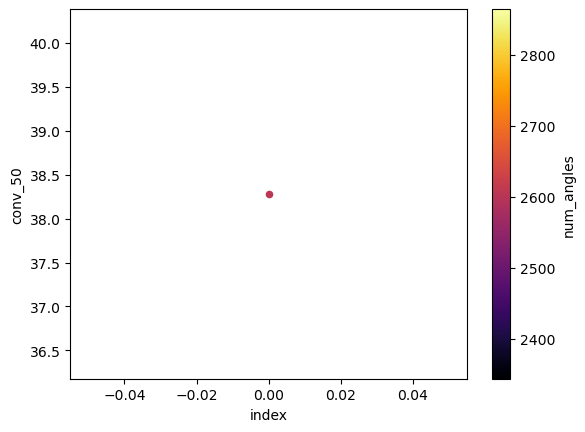

In [67]:
conv_valid.reset_index().plot.scatter(x='index', y='conv_50', c='num_angles', cmap='inferno')

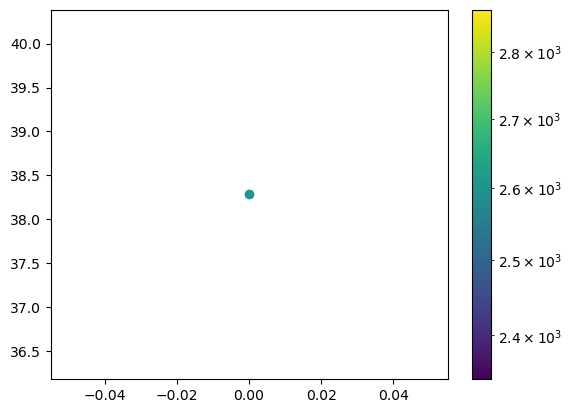

In [68]:
f, ax = plt.subplots()
m = ax.scatter(conv_valid.index, conv_valid['conv_50'], c=conv_valid['num_angles'], norm=matplotlib.colors.LogNorm())
plt.colorbar(m)

#### Testing Rotation Distance
http://www.boris-belousov.net/2016/12/01/quat-dist/ 

In [ ]:
R_final.as_matrix()[1]

In [ ]:
R_final.as_matrix()[1].T

In [ ]:
np.transpose(R_final.as_matrix(), axes=(0,2,1))[1]

In [ ]:
R_diff = R_init.as_matrix() * np.transpose(R_final.as_matrix(), axes=(0,2,1))

In [ ]:
R_diff[1]

In [ ]:
np.trace(R_diff, axis1=1, axis2=2)

In [ ]:
np.radians((np.trace(R_diff, axis1=1, axis2=2) - 1)/2)

In [ ]:
np.degrees(np.arccos(np.radians((np.trace(R_diff, axis1=1, axis2=2) - 1)/2)))